In [121]:
#변수 정보
#1.	Pregnancies: 임신 횟수
#2.	Glucose: 경구 포도당 내성 테스트에서 혈장 포도당 농도 (2시간)
#3.	BloodPressure: 이원 혈압(mmHg)
#4.	SkinThickness: 세발피부접힘(mm)
#5.	Insulin: 인슐린지수(인슐린 : 혈당 저하 호르몬)
#6.	BMI: 체질량지수
#7.	DiavetesPredigreeFunction: 당뇨병 혈통 기능
#8.	Age: 연령(년)
#9.	Outcome: 클래스 변수(0 또는 1) 768 중 268은 1이고 나머지는 0

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [123]:
data=pd.read_csv("C:\\Users\\Jeong SeungJu\\OneDrive\\바탕 화면\\운수데통\\diabetes.csv",header=0)

In [124]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [126]:
data.shape[:]

(768, 9)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
#이상치 제거
def boxplot(x,ax):
    a= sns.boxplot(x=x,data=data,ax=ax)
    return a

def IQR(y):
    b= (data[y].quantile(0.75)-data[y].quantile(0.25))*1.5
    return b

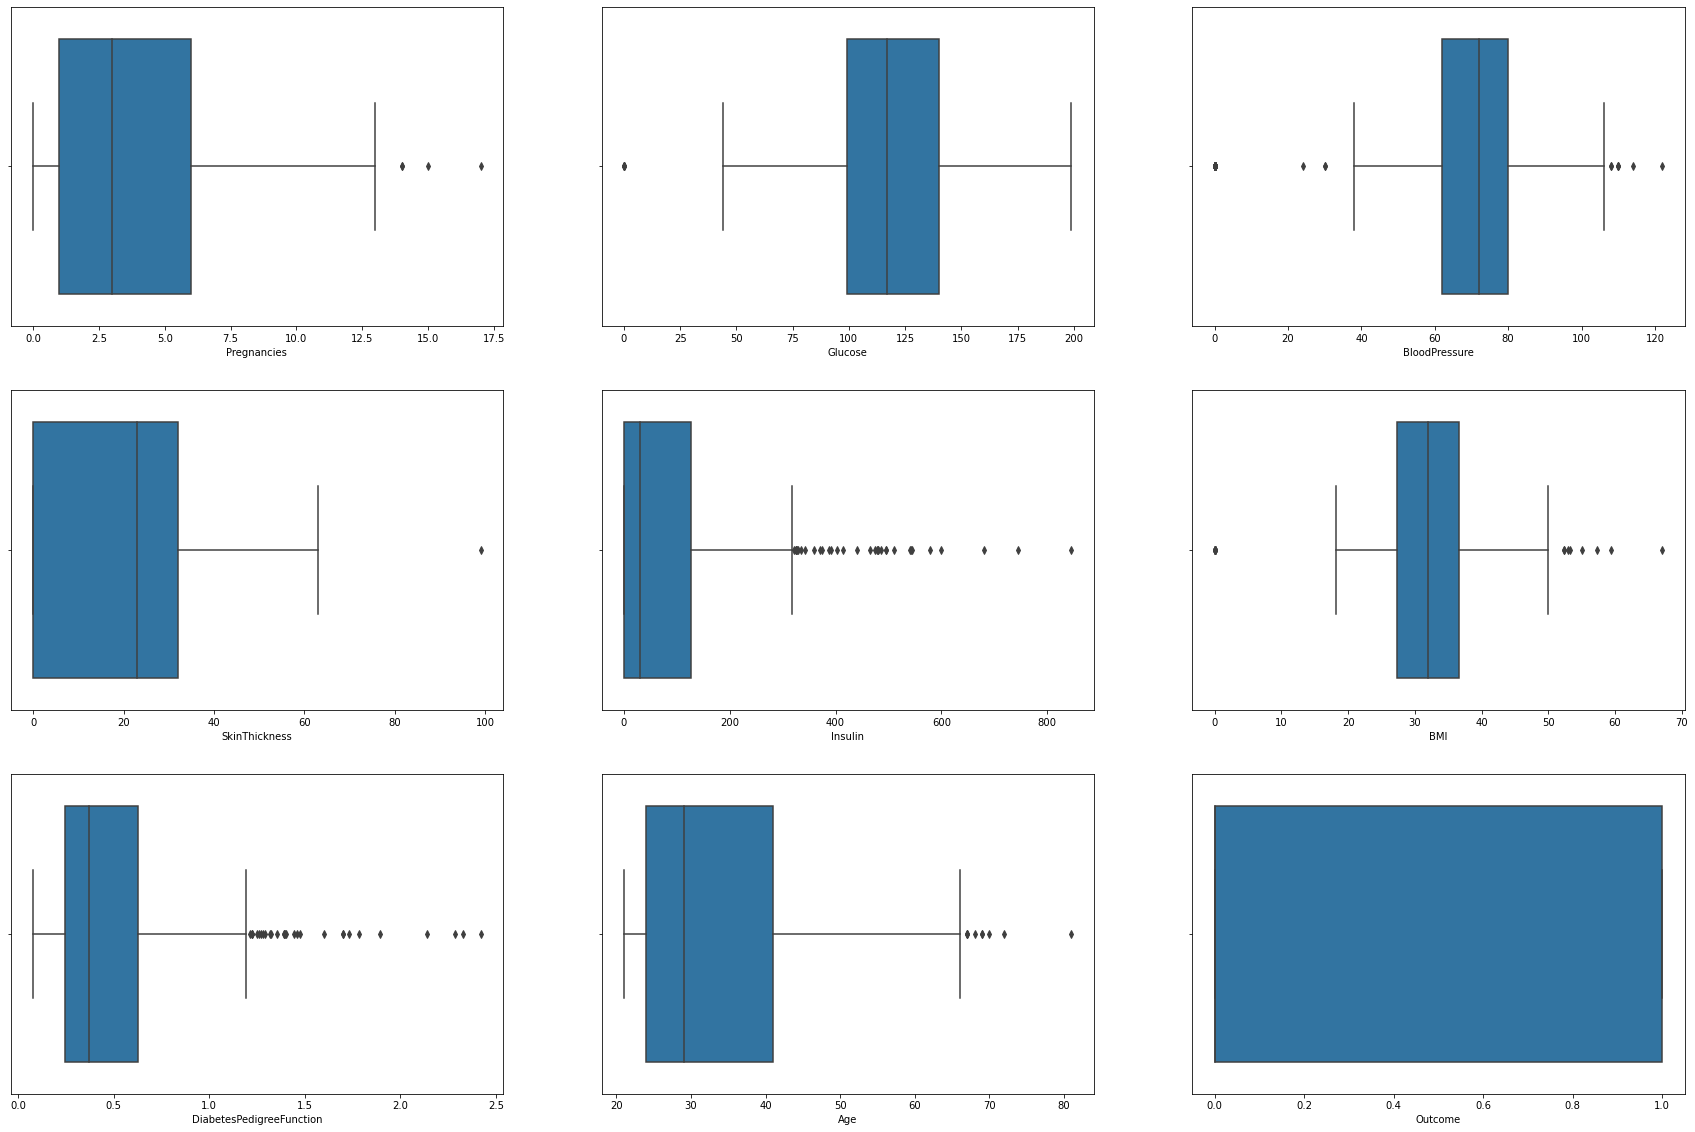

In [130]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(ncols=3,nrows=3)
figure.set_size_inches(30,20)

boxplot("Pregnancies",ax=ax1)
boxplot("Glucose",ax=ax2)
boxplot("BloodPressure",ax=ax3)
boxplot("SkinThickness",ax=ax4)
boxplot("Insulin",ax=ax5)
boxplot("BMI",ax=ax6)
boxplot("DiabetesPedigreeFunction",ax=ax7)
boxplot("Age",ax=ax8)
boxplot("Outcome",ax=ax9)

In [131]:
Pregn_out=data['Pregnancies'].quantile(0.75)+IQR('Pregnancies')

In [132]:
Glu_out=data['Glucose'].quantile(0.25)-IQR('Glucose')

In [133]:
Blood_out1=data['BloodPressure'].quantile(0.25)-IQR('BloodPressure')

In [134]:
Blood_out2=data['BloodPressure'].quantile(0.75)+IQR('BloodPressure')

In [135]:
Skin_out=data['SkinThickness'].quantile(0.75)+IQR('SkinThickness')

In [136]:
BMI_out1=data['BMI'].quantile(0.25)-IQR('BMI')

In [137]:
BMI_out2=data['BMI'].quantile(0.75)+IQR('BMI')

In [138]:
data3=data[(data['Pregnancies']<=Pregn_out)&(data['Glucose']>=Glu_out)&(data['BloodPressure']>=Blood_out1)&(data['BloodPressure']<=Blood_out2)&(data['SkinThickness']<=Skin_out)&(data['BMI']>=BMI_out1)&(data['BMI']<=BMI_out2)]

In [139]:
#이상치 제거 후 데이터
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               704 non-null    int64  
 1   Glucose                   704 non-null    int64  
 2   BloodPressure             704 non-null    int64  
 3   SkinThickness             704 non-null    int64  
 4   Insulin                   704 non-null    int64  
 5   BMI                       704 non-null    float64
 6   DiabetesPedigreeFunction  704 non-null    float64
 7   Age                       704 non-null    int64  
 8   Outcome                   704 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.0 KB


In [164]:
def boxplot2(x,ax):
    c= sns.boxplot(x=x,data=data3,ax=ax)
    return c

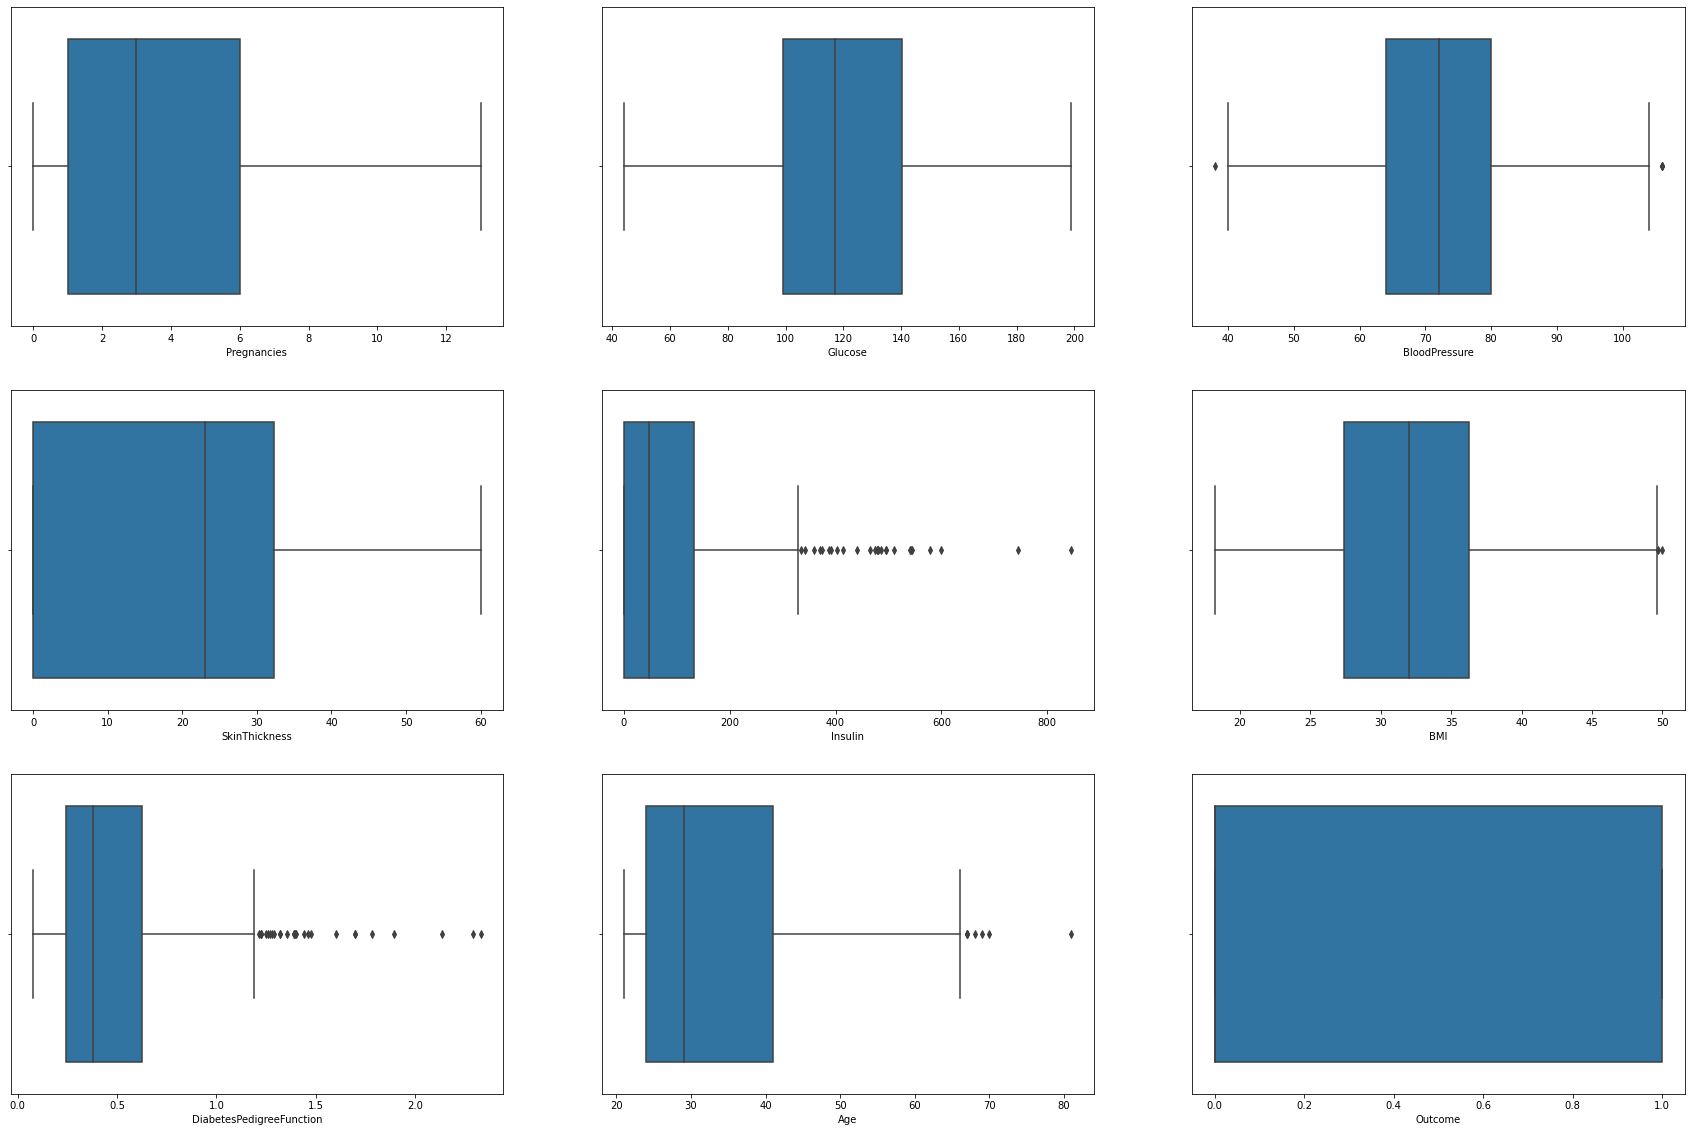

In [166]:
#이상치 제거 후 박스플랏
figure,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(ncols=3,nrows=3)
figure.set_size_inches(30,20)

boxplot2("Pregnancies",ax=ax1)
boxplot2("Glucose",ax=ax2)
boxplot2("BloodPressure",ax=ax3)
boxplot2("SkinThickness",ax=ax4)
boxplot2("Insulin",ax=ax5)
boxplot2("BMI",ax=ax6)
boxplot2("DiabetesPedigreeFunction",ax=ax7)
boxplot2("Age",ax=ax8)
boxplot2("Outcome",ax=ax9)

이상치 제거 전 Outcome: 
0    500
1    268
Name: Outcome, dtype: int64


이상치 제거 후 Outcome: 
0    468
1    236
Name: Outcome, dtype: int64




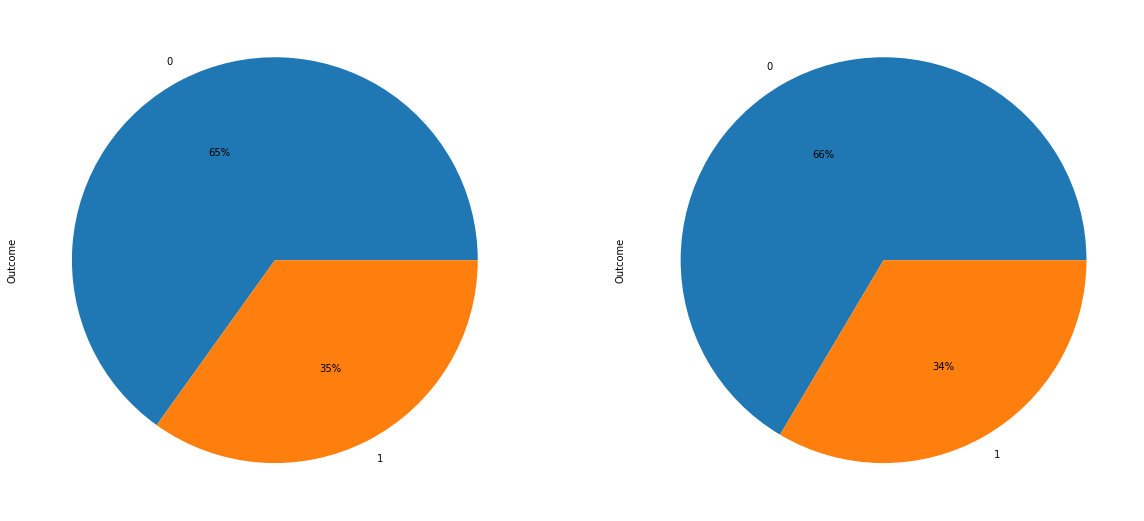

In [140]:
#이상치 제거 전후 Outcome 비율
figure,((ax1,ax2))=plt.subplots(ncols=2,nrows=1)
figure.set_size_inches(20,10)
print("이상치 제거 전 Outcome: ")
print(data['Outcome'].value_counts())
print("\n")
data['Outcome'].value_counts().plot.pie(autopct="%1.f%%",ax=ax1)

print("이상치 제거 후 Outcome: ")
print(data3['Outcome'].value_counts())
print("\n")
data3['Outcome'].value_counts().plot.pie(autopct="%1.f%%",ax=ax2)


In [141]:
def age_cat(Age):
    div=''
    if Age<30:
        div=1
    elif Age<40:
        div=2
    elif Age<50:
        div=3
    elif Age<60:
        div=4
    else:
        div=5
    return div

In [142]:
data3['age_cat']=data3['Age'].apply(lambda x:age_cat(x))

<ipython-input-142-bf15d045f862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_cat']=data3['Age'].apply(lambda x:age_cat(x))


1    362
2    151
3    108
4     55
5     28
Name: age_cat, dtype: int64

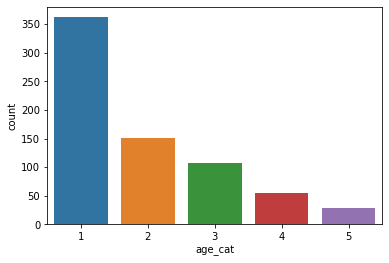

In [143]:
sns.countplot(x='age_cat',data=data3,order=data3['age_cat'].value_counts().index)
data3['age_cat'].value_counts()

In [144]:
#정규성 검정
from scipy import stats

In [145]:
def shapiro(x):
    return stats.shapiro(data3[x]).pvalue

In [146]:
print('Pregnancies : {:.3f}'.format(shapiro('Pregnancies')))
print('Glucose : {:.3f}'.format(shapiro('Glucose')))
print('BloodPressure : {:.3f}'.format(shapiro('BloodPressure')))
print('SkinThickness : {:.3f}'.format(shapiro('SkinThickness')))
print('Insulin : {:.3f}'.format(shapiro('Insulin')))
print('BMI : {:.3f}'.format(shapiro('BMI')))
print('DiabetesPedigreeFunction : {:.3f}'.format(shapiro('DiabetesPedigreeFunction')))
print('Age : {:.3f}'.format(shapiro('Age')))

Pregnancies : 0.000
Glucose : 0.000
BloodPressure : 0.061
SkinThickness : 0.000
Insulin : 0.000
BMI : 0.000
DiabetesPedigreeFunction : 0.000
Age : 0.000


Outcome
0    70.720085
1    74.834746
Name: BloodPressure, dtype: float64

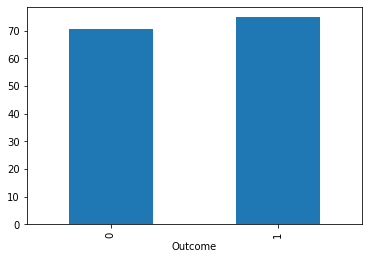

In [147]:
Group=data3.groupby('Outcome').mean()
Group['BloodPressure'].plot.bar()
Group['BloodPressure']

In [148]:
#당뇨증상 유무에 따른 혈압 차이(t검정)
Positive=data3[data3['Outcome']==1]
Negative=data3[data3['Outcome']==0]

In [149]:
stats.ttest_ind(Positive['BloodPressure'],Negative['BloodPressure'],equal_var=False)

Ttest_indResult(statistic=4.580566541746025, pvalue=5.934714799887117e-06)

In [150]:
#상관분석
corrmat=data.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


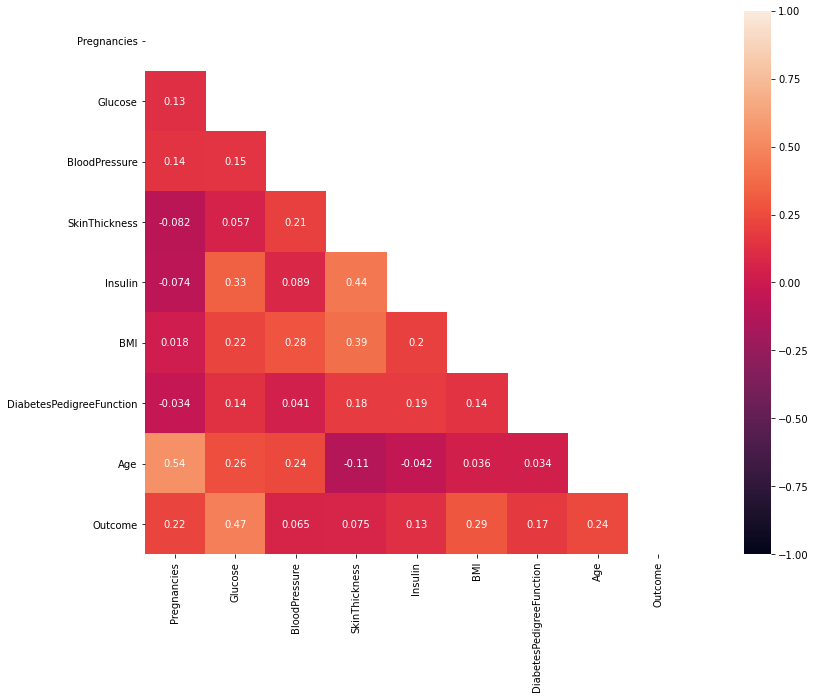

In [151]:
mask=np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

figure, ax=plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corrmat, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

In [152]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

In [153]:
x_data=data3.iloc[:,4:10]
y_data=data3['Outcome']

In [154]:
x_data=x_data.drop(['DiabetesPedigreeFunction','Age','Outcome'],axis=1)

In [155]:
x_data.head()

,Insulin,BMI,age_cat
0,0,33.6,4
1,0,26.6,2
2,0,23.3,2
3,94,28.1,1
4,168,43.1,2


In [156]:
x=x_data.values
y=y_data.values

In [157]:
x,y

(array([[  0. ,  33.6,   4. ],
        [  0. ,  26.6,   2. ],
        [  0. ,  23.3,   2. ],
        ...,
        [112. ,  26.2,   2. ],
        [  0. ,  30.1,   3. ],
        [  0. ,  30.4,   1. ]]),
 array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 

In [158]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [159]:
estimator=LogisticRegression().fit(x,y)


In [160]:
y_predict=estimator.predict(x_train)
train_score=metrics.accuracy_score(y_train,y_predict)
print("훈련 데이터 정확도 : {0:.3f}".format(train_score))

훈련 데이터 정확도 : 0.703


In [161]:
y_predict = estimator.predict(x_test)
test_score=metrics.accuracy_score(y_test,y_predict)
print("검증 데이터 정확도 : {0:.3f}".format(test_score))

검증 데이터 정확도 : 0.689


In [162]:
confmat=pd.DataFrame(confusion_matrix(y_test,y_predict),index=['True[0]','True[1]'],
                    columns=['Predict[0]','Predict[1]'])

In [163]:
confmat

,Predict[0],Predict[1]
True[0],122,21
True[1],45,24


In [ ]:
#데이터의 최소 연령은 21세였으며 20대가 가장 많았다.
#정규성검정 결과 혈압을 제외한 모든 변수가 정규분포를 띠지 않고 있다.
#당뇨에 걸린 사람과 그렇지 않은 사람의 혈압의 평균에 차이가 있다.
#상관분석 결과 나이와 임신 횟수, 인슐린지수와 혈장 포도당 농도, 인슐린지수와 세발피부접힘, 당뇨의 유무와 혈장 포도당 농도 사이
#뚜렷한 양의 상관관계가 나타났다.

#나이대, 인슐린지수, BMI로 Outcome의 여부를 로지스틱회귀분석으로 모델링하였으며 train,test데이터를 7:3으로 분할
#예측 결과 훈련용데이터에서 70.3%의 정확도를 보여줬고 검증용데이터에서는 68.9%의 정답을 맞출 수 있었다.
#정확도가 괜찮게 나왔지만 데이터 수가 너무 적어 분석 결과를 일반화시키기에는 한계가 있는 것 같다.